# Distancias en Clustering

### Veremos 3 de las técnicas mas utilizadas en clustering.

- Distancia entre vecinos:
    > **Distancia Euclidiana:** d = sqrt((x_2 - x_1)² + (y_2 - y_1)²)
    >
    > **Distancia de Chebyshev:** d = max(|x_1 - x_2|, |y_1 - y_2|). Tambían conocida como la **distancia del tablero de ajedrez.
    >
    > **Distancia Manhatan:** d = |x_1 - x_2| + |y_1 - y_2|

- Su uso dependerá de lo que necesitemos

# Clusterización: Métricas de Distancia

### Contexto y Datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Carga de datos
datos = np.loadtxt('./venta_propiedades.csv', delimiter=",")
datos

array([[ 1.698042,  6.194126],
       [ 1.028309, 10.013562],
       [ 1.498665, 17.396522],
       [ 0.98841 , 23.138509],
       [ 1.04231 , 23.670459],
       [ 1.064285, 26.133856],
       [ 0.989924, 27.16672 ],
       [ 1.669657,  4.04883 ],
       [ 2.293296,  4.316585],
       [ 1.72207 ,  6.682627],
       [ 1.953625, 11.935053],
       [ 1.90847 , 12.923869],
       [ 2.289934, 16.889879],
       [ 1.660117, 19.655691],
       [ 2.466798, 22.377591],
       [ 2.071634, 23.62688 ],
       [ 1.671516, 24.729412],
       [ 2.290002, 26.235495],
       [ 2.500313, 26.542467],
       [ 2.533102, 27.009691],
       [ 2.156764,  4.23155 ],
       [ 2.343182,  5.833884],
       [ 3.187092,  8.609015],
       [ 3.24478 , 12.973447],
       [ 3.49809 , 15.877665],
       [ 2.571818, 21.723563],
       [ 2.534513, 23.120548],
       [ 3.13085 , 23.566369],
       [ 2.391875, 24.881976],
       [ 3.121214, 24.157039],
       [ 2.845953, 26.476777],
       [ 3.024891, 27.191277],
       [

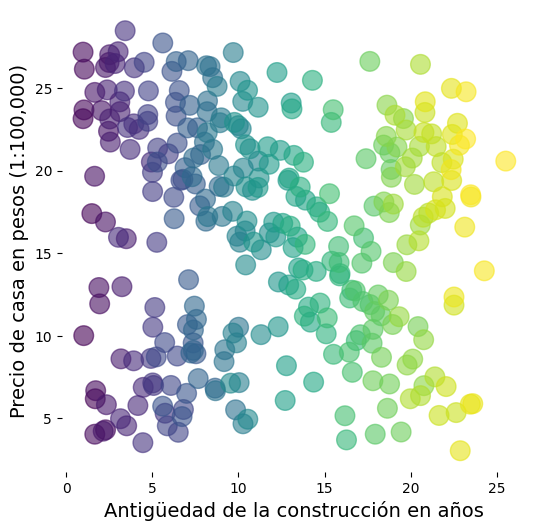

In [5]:
# Grafica de datos
plt.figure(figsize=(6, 6))
plt.scatter(datos[:, 0], datos[:, 1],
            c=np.linspace(0, 1, datos.shape[0]), s=200, alpha=0.6)
plt.xlabel("Antigüedad de la construcción en años", fontsize=14)
plt.ylabel("Precio de casa en pesos (1:100,000)", fontsize=14)
plt.box(False)
plt.show()

# Métricas de distancia entre vecinos

### DBSCAN - Scikit-Learn

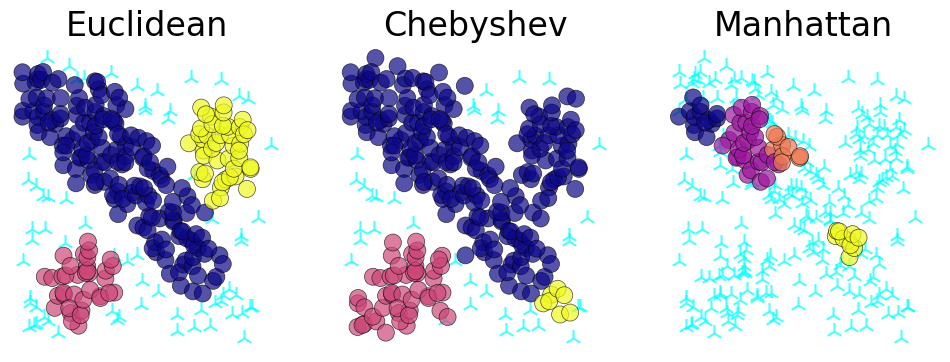

In [11]:
from sklearn.cluster import DBSCAN

# Carga de datos
datos = np.loadtxt("./venta_propiedades.csv", delimiter=",")

# Identificar clusters con diferentes distancias
distancias = ["euclidean", "chebyshev", "manhattan"]

fig = plt.figure(figsize=(12, 4))
plt.set_cmap("plasma")
for d in range(len(distancias)):
    clusters = DBSCAN(2, min_samples=10,
                      metric=distancias[d]).fit_predict(datos)
    ax = fig.add_subplot(1, 3, d+1)
    
    # Puntos considerados ruido
    ax.scatter(datos[clusters==-1][:, 0], datos[clusters==-1][:, 1], 
               c="cyan", s=150, marker="2", alpha=0.7)
    
    # puntos pertenencientes a clusters
    ax.scatter(datos[clusters>=0][:, 0], datos[clusters>=0][:, 1], 
               c=clusters[clusters>=0], s=150, 
               linewidth=0.5, edgecolors="black", alpha=0.7)
    ax.set_title(distancias[d].capitalize(), fontsize=24)
    ax.axis("off")
    
plt.show()